# K-means

### TODO:
- přidat příklady z dokumentace sklearn

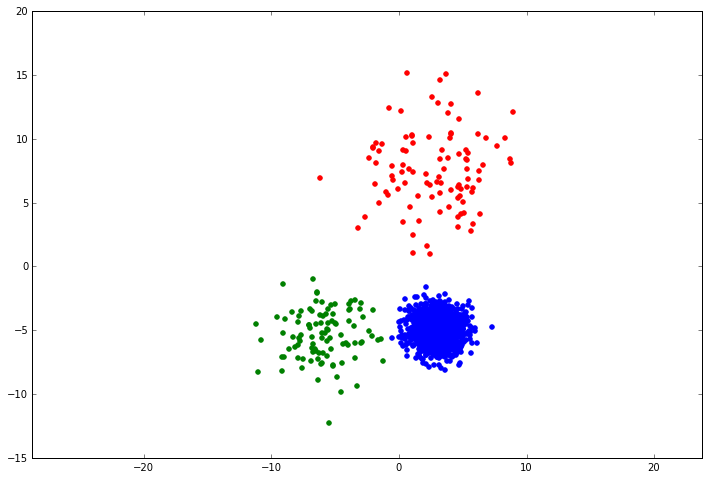

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.cm as cm

def gen_cluster(x, y, r, s=100):
    xs = r * np.random.randn(s) + x
    ys = r * np.random.randn(s) + y
    return xs, ys

def plot_cluster(cl, c):
    x, y = cl
    plt.scatter(x, y, color=c)
    return cl

plt.figure(figsize=(12,8))
plt.axis('equal')
c1 = plot_cluster(gen_cluster(3, 8, 3), 'r')
c2 = plot_cluster(gen_cluster(-6, -5, 2), 'g')
c3 = plot_cluster(gen_cluster(3, -5, 1, 1500), 'b')

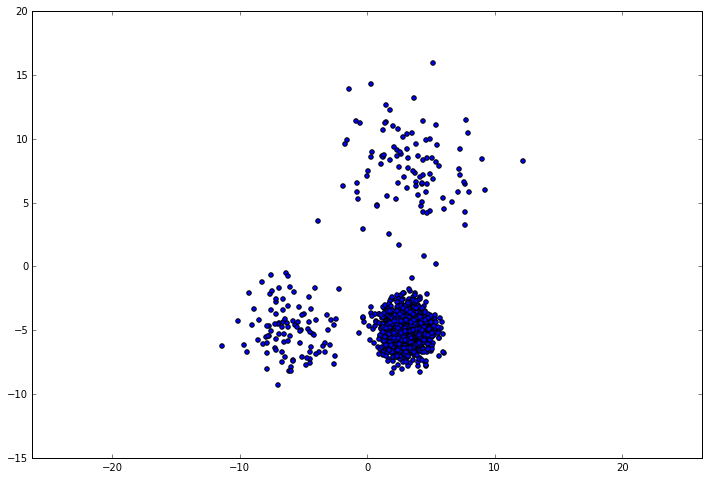

In [3]:
data_x = np.concatenate((c1[0], c2[0], c3[0]))
data_y = np.concatenate((c1[1], c2[1], c3[1]))

plt.figure(figsize=(12,8))
plt.axis('equal')
plt.scatter(data_x, data_y)
plt.show()

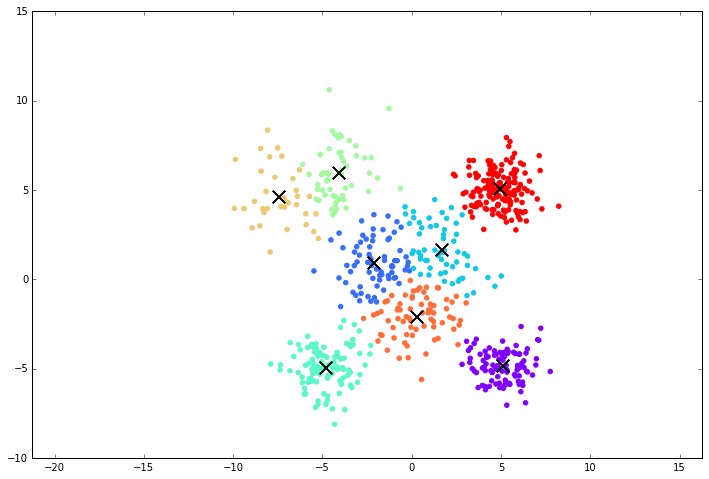

In [5]:
data = np.column_stack((data_x, data_y))

def plot_kmeans(k, data, axArg=None):
    c = len(k.cluster_centers_)
    if axArg == None:
        plt.figure(figsize=(12,8))
        plt.axis('equal')
        ax = plt.gca()
    else:
        ax = axArg
    colors = cm.rainbow(np.linspace(0, 1, c))
    xs = [x[0] for x in data]
    ys = [x[1] for x in data]
    cs = [colors[i] for i in k.labels_]
    sc1 = ax.scatter(xs, ys, color=cs)
    for i in range(c):
        sc2 = ax.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color='black', s=150, marker='x')
    if axArg == None:
        plt.show()
    else:
        return sc1, sc2

kmeans = KMeans()
kmeans.fit(data)
plot_kmeans(kmeans, data)

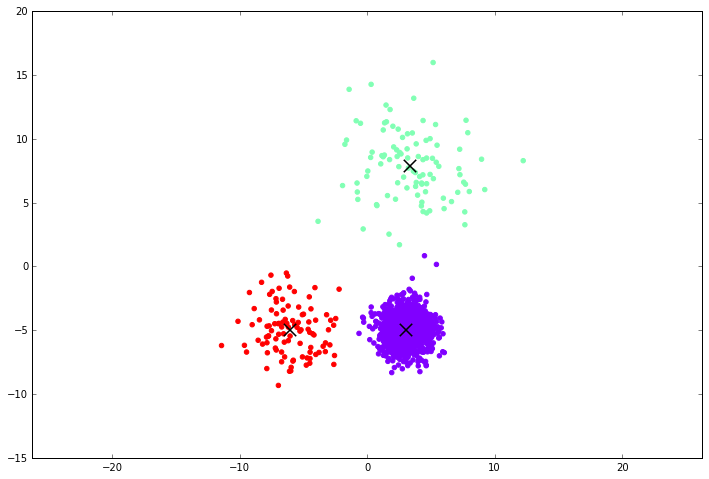

In [5]:
kmeans = KMeans(n_clusters=3, max_iter=10)
kmeans.fit(data)
plot_kmeans(kmeans, data)

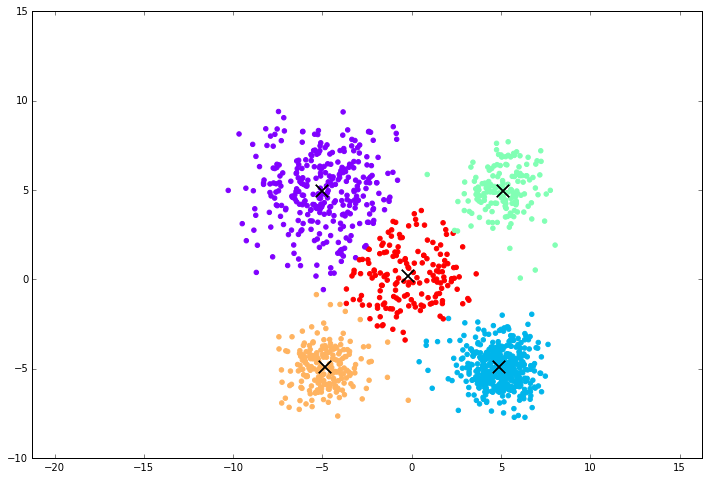

In [9]:
cs = [ gen_cluster(5,5,1,160)
     , gen_cluster(-5,-5,1,200)
     , gen_cluster(-5,5,2,300)
     , gen_cluster(5, -5, 1,400)
     , gen_cluster(0, 0, 2, 200)
     ]
data_x = np.concatenate([c[0] for c in cs])
data_y = np.concatenate([c[1] for c in cs])
data = np.column_stack((data_x, data_y))
kmeans = KMeans(n_clusters=5, max_iter=1)
kmeans.fit(data)
plot_kmeans(kmeans, data)

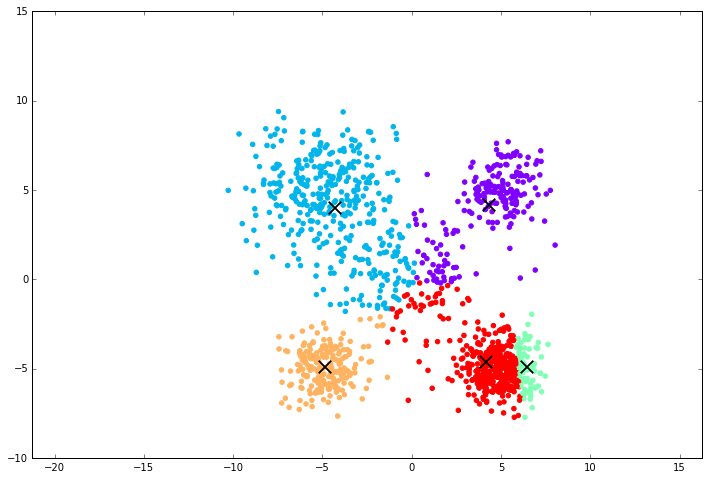

In [10]:
kmeans = KMeans(n_clusters=5, random_state=123, init='random', max_iter=1)
kmeans.fit(data)
plot_kmeans(kmeans, data)

In [42]:
from math import sqrt

class MyKMeans(object):
    
    def __init__(self, data, c):
        self.data = data
        self.c = c
        x_min = min(data[:,0])
        x_max = max(data[:,0])
        y_min = min(data[:,1])
        y_max = max(data[:,1])
        self.cluster_centers_ = np.array([[np.random.random(1)[0] * (x_max - x_min) + x_min
                                         , np.random.random(1)[0] * (y_max - y_min) + y_min] for _ in range(c)])
        self.update_labels()
        
    def update_labels(self):
        self.labels_=[self.nearest_c(x) for x in data]
        
    def update_centers(self):
        for i in range(self.c):
            c_data = np.array([x for (x, y) in zip(self.data, self.labels_) if y == i])
            self.cluster_centers_[i][0] = sum(c_data[:,0]) / len(c_data)
            self.cluster_centers_[i][1] = sum(c_data[:,1]) / len(c_data)
        
    def nearest_c(self, x):
        c_i = -1
        d = float('inf')
        dist = lambda a, b: sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
        for i in range(len(self.cluster_centers_)):
            d_x = dist(self.cluster_centers_[i], x)
            if d_x < d:
                c_i = i
                d = d_x
        return c_i

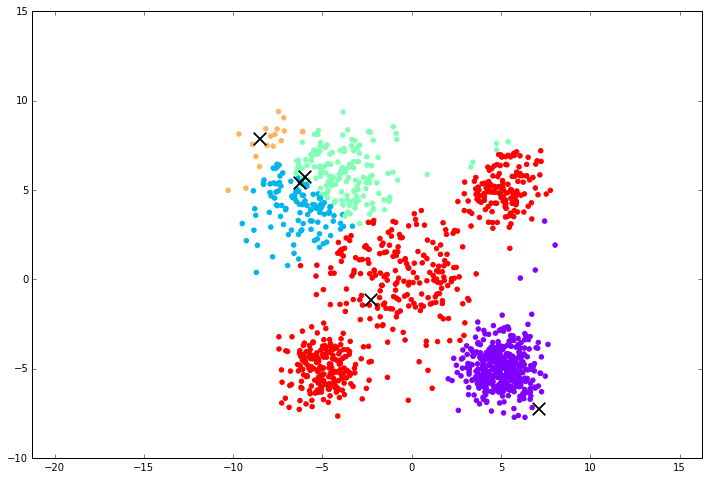

In [44]:
k = MyKMeans(data, 5)

plot_kmeans(k, data)

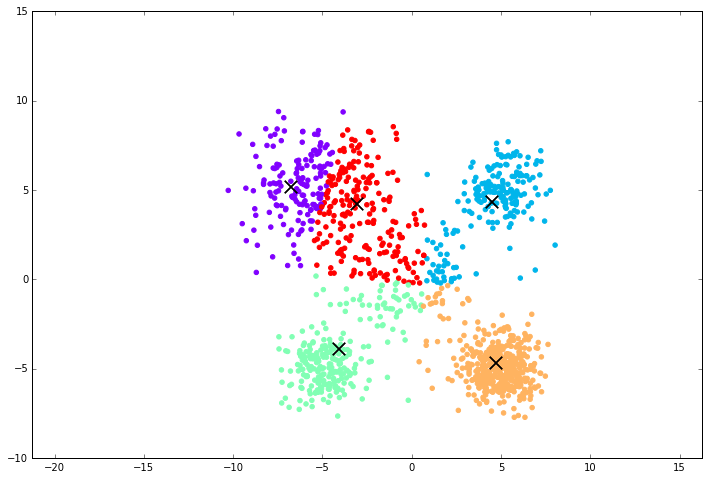

In [38]:
k.update_labels()
#k.update_centers()
plot_kmeans(k, data)

In [50]:
# inspired by http://stackoverflow.com/a/9416663

from matplotlib import animation
from IPython.display import HTML

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, data, c):
        self.data = data
        self.i = 0
        self.c = c
        self.k = MyKMeans(data, c)
        
        self.colors = cm.rainbow(np.linspace(0, 1, c))

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        self.fig.set_size_inches(12,8)
        self.ax.axis('equal')
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=1500,
                                           frames = 25,
                                           init_func=self.setup_plot, blit=False)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        self.sc1 = self.ax.scatter(self.data[:, 0], self.data[:,1], color=[self.colors[0] for x in data[:,0]])
        self.sc2 = self.ax.scatter([], [], color='black', s=150, marker='x')
        return (self.sc1, self.sc2)

    def update(self, i):
        """Update the scatter plot."""
        self.i += 1
        print(self.i, end=" ")
        if (self.i % 2 == 1):
            self.k.update_labels()
        else:
            self.k.update_centers()
        cs = np.array([self.colors[x] for x in self.k.labels_])
        self.sc1.set_color(cs)
        self.sc2.set_offsets(np.array(self.k.cluster_centers_))

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return (self.sc1, self.sc2)
    
    def show(self):
        plt.show()

a = AnimatedScatter(data, 5)
plt.close(a.ani._fig)
HTML(a.ani.to_html5_video())

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 